In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [70]:
#importing data 
data = pd.read_csv('Global+Superstore+Data.csv')
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [71]:
data.shape

(51290, 5)

In [72]:
#converting the order date column to date time format (yyyy-mm)
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('m')

In [73]:
data.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-05,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-05,Consumer,Africa,2832.960,311.5200


In [74]:
#checking the column for null values 
data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Order Date  51290 non-null  period[M]
 1   Segment     51290 non-null  object   
 2   Market      51290 non-null  object   
 3   Sales       51290 non-null  float64  
 4   Profit      51290 non-null  float64  
dtypes: float64(2), object(2), period[M](1)
memory usage: 2.0+ MB


In [76]:
#combining the marget and segment column to form a new column 
data['Segment-Market']=data['Segment']+'-'+data['Market']
data.head()

,Order Date,Segment,Market,Sales,Profit,Segment-Market
0,2012-07,Consumer,US,2309.650,762.1845,Consumer-US
1,2013-05,Corporate,APAC,3709.395,-288.7650,Corporate-APAC
2,2013-10,Consumer,APAC,5175.171,919.9710,Consumer-APAC
3,2013-01,Home Office,EU,2892.510,-96.5400,Home Office-EU
4,2013-05,Consumer,Africa,2832.960,311.5200,Consumer-Africa


In [77]:
len(list(data['Segment-Market'].unique()))

21

Hence there are 21 unique segment market combinations 

In [78]:
#train test split
data_train = data[data['Order Date'] <= '2014-06']
data_test = data[data['Order Date'] > '2014-06']

In [79]:
data_train.head()

,Order Date,Segment,Market,Sales,Profit,Segment-Market
0,2012-07,Consumer,US,2309.650,762.1845,Consumer-US
1,2013-05,Corporate,APAC,3709.395,-288.7650,Corporate-APAC
2,2013-10,Consumer,APAC,5175.171,919.9710,Consumer-APAC
3,2013-01,Home Office,EU,2892.510,-96.5400,Home Office-EU
4,2013-05,Consumer,Africa,2832.960,311.5200,Consumer-Africa


In [80]:
data_test.head()

,Order Date,Segment,Market,Sales,Profit,Segment-Market
8,2014-10,Corporate,US,5083.960,1906.485,Corporate-US
15,2014-07,Corporate,EU,1869.588,186.948,Corporate-EU
17,2014-08,Corporate,EU,7958.580,3979.080,Corporate-EU
24,2014-07,Consumer,LATAM,1713.840,445.520,Consumer-LATAM
41,2014-11,Home Office,APAC,4518.780,632.520,Home Office-APAC


In [81]:
len(list(data_train['Order Date'].unique()))

42

In [82]:
len(list(data_test['Order Date'].unique()))

6

In [83]:
datag = data_train.pivot_table(index='Order Date', values='Profit', columns='Segment-Market', aggfunc='sum')

In [84]:
datag.head()

Segment-Market,Consumer-APAC,Consumer-Africa,Consumer-Canada,Consumer-EMEA,Consumer-EU,Consumer-LATAM,Consumer-US,Corporate-APAC,Corporate-Africa,Corporate-Canada,...,Corporate-EU,Corporate-LATAM,Corporate-US,Home Office-APAC,Home Office-Africa,Home Office-Canada,Home Office-EMEA,Home Office-EU,Home Office-LATAM,Home Office-US
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,265.539,447.33,-2952.594,2259.8670,540.44312,2465.8368,-173.7264,520.026,12.57,...,841.3875,1021.05924,643.3689,230.2656,391.515,NaN,392.526,2534.568,-26.59744,1233.9329
2011-02,4627.8531,-201.888,26.43,464.160,-783.9945,1227.86616,1853.5541,3600.7776,-31.689,9.24,...,2234.4060,814.03020,421.9256,617.5407,825.606,87.99,368.070,162.255,-356.80440,553.9467
2011-03,2337.8319,919.074,82.47,706.380,1273.7100,2427.39612,204.2007,3634.9365,244.437,NaN,...,2206.5960,178.66400,127.4696,205.1052,83.430,84.03,-15.570,269.745,769.88400,-268.9314
2011-04,633.6423,381.315,55.08,121.353,2980.0065,1368.82948,1434.8636,90.7521,941.751,6.51,...,981.1470,872.64068,494.7315,603.8478,417.618,NaN,-456.510,130.371,-554.22952,2723.4358
2011-05,3838.9500,-39.981,0.87,172.554,673.0080,1749.39200,833.9433,1028.4489,490.650,NaN,...,1719.0600,134.87252,2912.7976,102.0315,39.180,NaN,-33.591,443.310,-397.95600,145.7781


here we wil find the coffecient of variance(COV) of each segment market combination to find the most stable and reliable segment market i.e. the one with lowest value of COV

In [85]:
for i in datag.columns:
     m=datag[i].mean()
     s=datag[i].std()
     cov=s/m
     print(cov,i)

0.5290613481452427 Consumer-APAC
1.326234355115578 Consumer-Africa
1.2670987817143822 Consumer-Canada
2.684648041230743 Consumer-EMEA
0.6024300983697823 Consumer-EU
0.692058673646338 Consumer-LATAM
1.0227789635225293 Consumer-US
0.5364756686843114 Corporate-APAC
1.9146751542131133 Corporate-Africa
1.812884409296696 Corporate-Canada
6.432057690698172 Corporate-EMEA
0.7308287878664032 Corporate-EU
0.8928703126637052 Corporate-LATAM
1.084820951752197 Corporate-US
1.0204407571943117 Home Office-APAC
2.037336997275983 Home Office-Africa
2.4206617515969757 Home Office-Canada
7.828127581786364 Home Office-EMEA
0.9494426091054605 Home Office-EU
1.183871862615309 Home Office-LATAM
1.1376556047425066 Home Office-US


##### Here we can see that Consumer APAC has the lowest COV hence it is our most profitable segment.

In [86]:
dt_final = data.loc[data['Segment-Market']=='Consumer-APAC'] 
dt_final.head()

,Order Date,Segment,Market,Sales,Profit,Segment-Market
2,2013-10,Consumer,APAC,5175.171,919.971,Consumer-APAC
6,2011-07,Consumer,APAC,1822.080,564.840,Consumer-APAC
7,2012-04,Consumer,APAC,5244.840,996.480,Consumer-APAC
14,2013-06,Consumer,APAC,3701.520,1036.080,Consumer-APAC
29,2012-02,Consumer,APAC,1878.720,582.360,Consumer-APAC


In [87]:
dt_final.shape

(5699, 6)

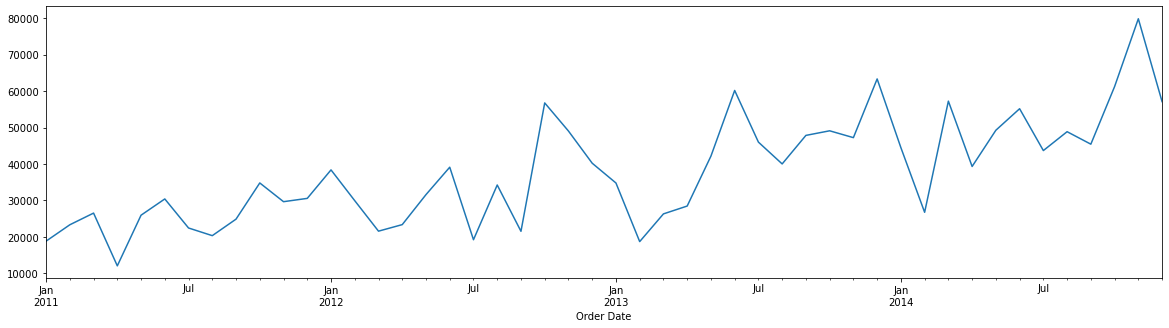

In [88]:
dt_final.groupby('Order Date')['Sales'].sum().plot(figsize=(20,5))
plt.show()

In [89]:
data_final=pd.DataFrame(dt_final.groupby('Order Date')['Sales'].sum())
data_final.head()

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000


In [90]:
data_final= data_final.to_timestamp()
data_final.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


## Decomposition of time series

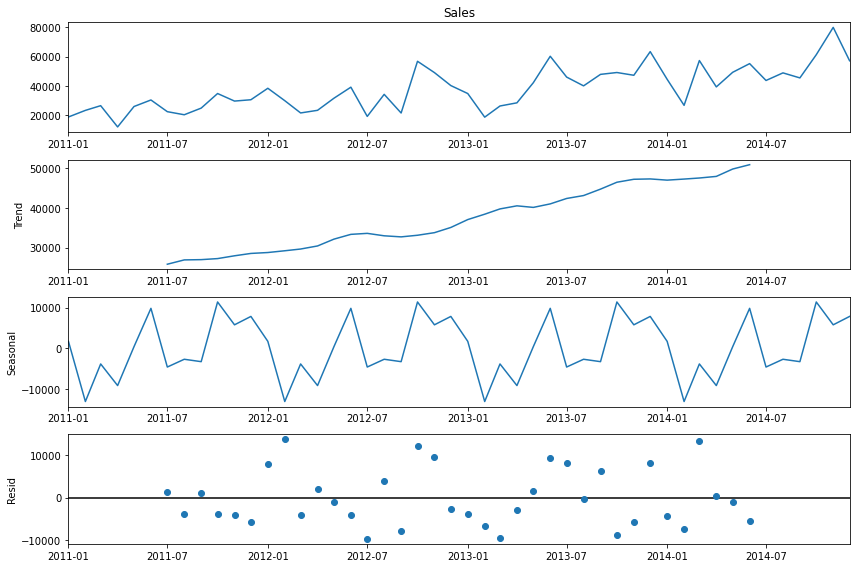

In [91]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data_final['Sales'], model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

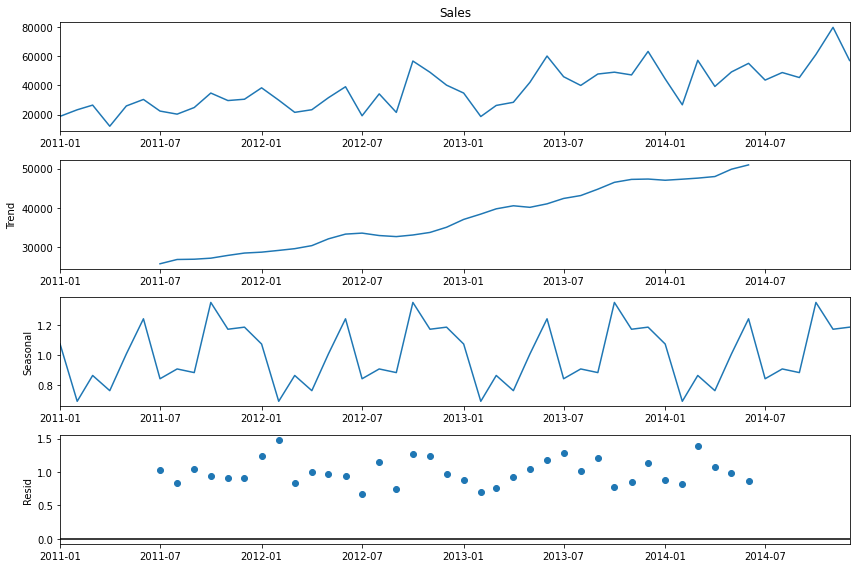

In [92]:
decomposition = sm.tsa.seasonal_decompose(data_final.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

## Test Train Split

In [93]:
train_len = 42
train = data_final[0:train_len] 
test = data_final[train_len:] 

In [94]:
train

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000
2011-06-01,30398.9316
2011-07-01,22431.5949
2011-08-01,20331.0735
2011-09-01,24860.3949


In [95]:
test

,Sales
Order Date,
2014-07-01,43672.0749
2014-08-01,48848.3409
2014-09-01,45424.3119
2014-10-01,61221.9792
2014-11-01,79834.4295
2014-12-01,57099.9858


# Building models

## Smoothening

## Simple exponential smoothening

In [96]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.3,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)


### Plot train, test and forecast

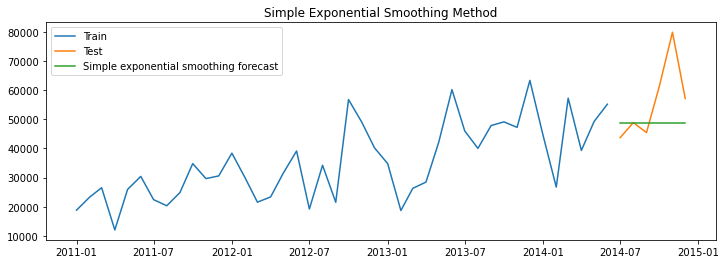

In [97]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [98]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14312.82,15.52


## Holt's exponential smoothing

In [99]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=6 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2642857142857143, 'smoothing_trend': 0.19220779220779222, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 18821.989799999996, 'initial_trend': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

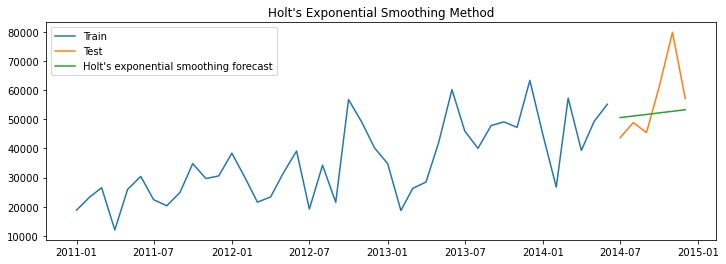

In [100]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [101]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14312.82,15.52
0,Holt's exponential smoothing method,12403.84,14.93


## Holt winter's additive method

In [102]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833339, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

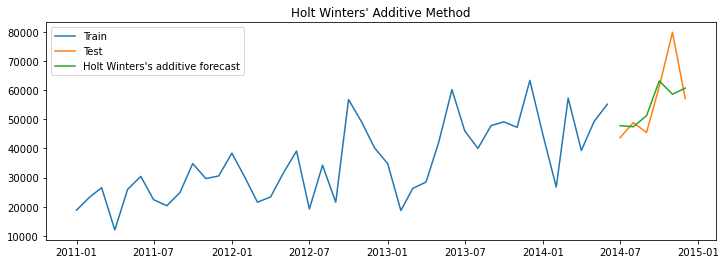

In [103]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [104]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14312.82,15.52
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17


## Holt Winter's multiplicative method with trend and seasonality

In [105]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833339, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

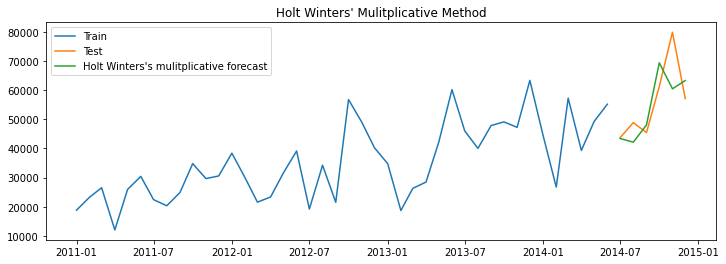

In [106]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [107]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14312.82,15.52
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43


## Stationarity Test

### Augmented Dickey-Fuller (ADF) test

In [108]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_final['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [109]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data_final['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


The KPSS test suggests that the series is not stationary. We will perform boc=xcox transformation and differencing

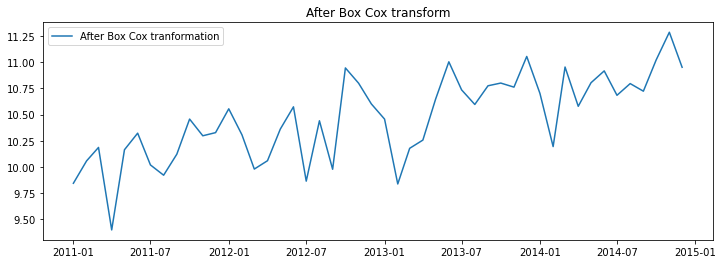

In [110]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data_final['Sales'], lmbda=0), index = data_final.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

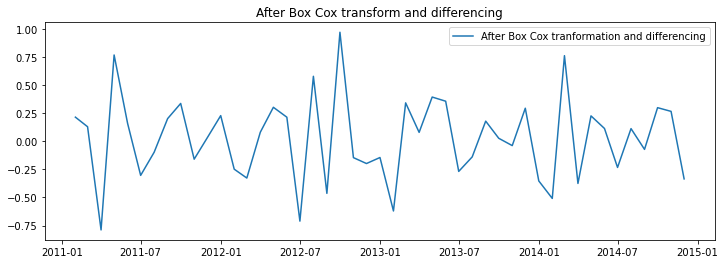

In [111]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data_final.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [112]:
data_boxcox_diff.dropna(inplace=True)

In [113]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
Freq: MS, dtype: float64

### Augmented Dickey-Fuller (ADF) test

In [114]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test


In [115]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


#### Now our series is stationary

In [116]:
#train test split 
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

## Auto regression method (AR)

In [117]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


### Recover original time series

In [118]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

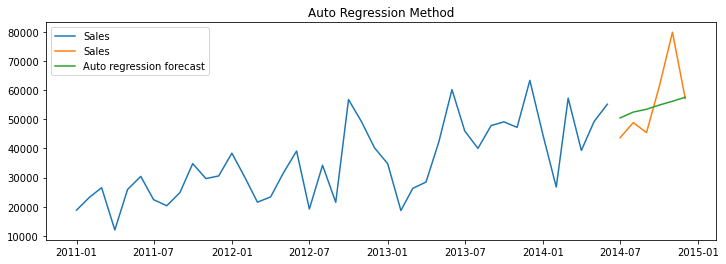

In [119]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Sales')
plt.plot(test['Sales'], label='Sales')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [120]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14312.82,15.52
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56


## Moving average method (MA)


In [121]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


### Recover original time series


In [122]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

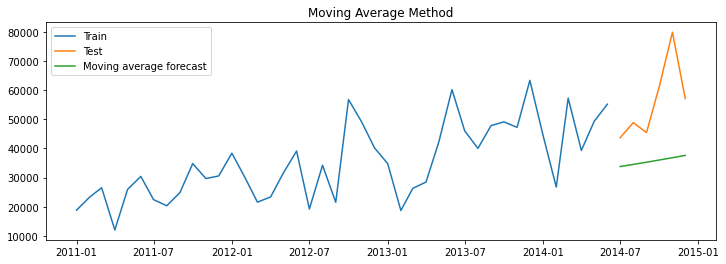

In [123]:
plt.figure(figsize=(12,4))
plt.plot(data_final['Sales'][:train_len], label='Train')
plt.plot(data_final['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [124]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14312.82,15.52
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


## Auto regression moving average method (ARMA)


In [125]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


### Recover original time series

In [126]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

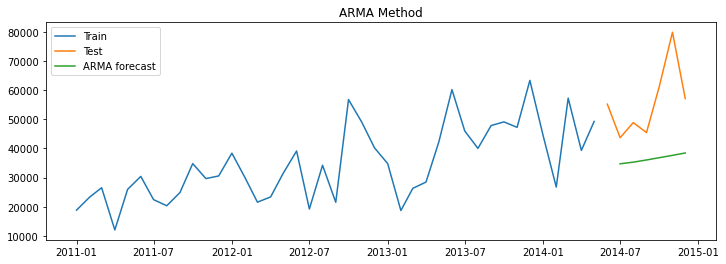

In [127]:
plt.figure(figsize=(12,4))
plt.plot( data_final['Sales'][:train_len-1], label='Train')
plt.plot(data_final['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE

In [128]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14312.82,15.52
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


## Auto regressive integrated moving average (ARIMA)

In [129]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


### Recover original time series

In [130]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

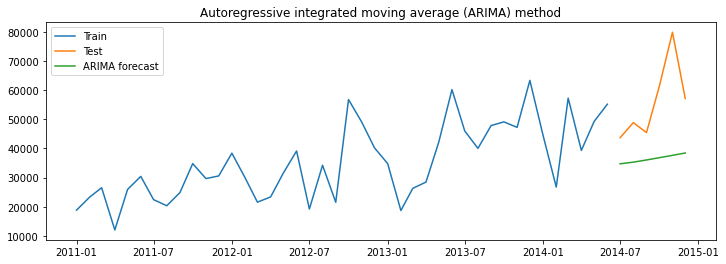

In [131]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [132]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14312.82,15.52
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40
0,Autoregressive integrated moving average (ARIM...,22654.32,32.40


### SARIMA

In [133]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.041535
ma.L1      -0.996177
ar.S.L12    0.099921
ma.S.L12   -0.963155
sigma2      0.058797
dtype: float64


### Recover original time series forecast

In [134]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

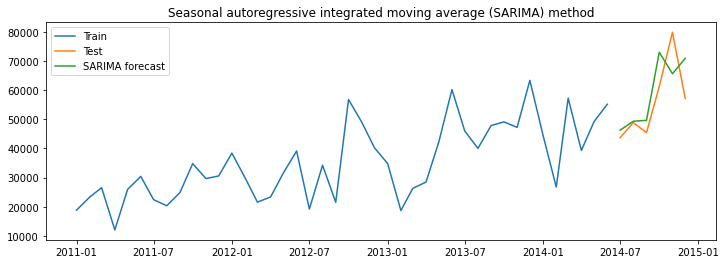

In [136]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [137]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,14312.82,15.52
0,Holt's exponential smoothing method,12403.84,14.93
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40
0,Autoregressive integrated moving average (ARIM...,22654.32,32.40
0,Seasonal autoregressive integrated moving aver...,9618.62,12.88


## Conclusions

- The most profitable market segment combination was the consumer APAC. IT is the most reliable consumer segment as it has the lowest coefficient of variance among all.
- Out of all the models we created Holt winter’s additive method came out to be the best among the smoothening techniques with a MAPE of 10.17 which was the lowest of all the models and SARIMA cam out to be the best model mong the ARIMA techniques with a MAPE of 12.88
- These 2 models captured the trend and the seasonality well and hence were able to give close predictions.
- The single best model was Holt Winters's additive model as it has the lowest MAPE value among all. Hence this model should be used for making predictions.